In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
import glob
from keras.preprocessing.image import ImageDataGenerator as idg
from keras.layers import Dropout
import math
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D,Dropout, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import sklearn

import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir


%matplotlib inline

import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import sys
import keras
keras.__version__
from keras import layers
from keras import models
from keras import optimizers
from keras.optimizers import SGD
%matplotlib inline
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
import sklearn
import cv2

import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from os import listdir
tf.keras.preprocessing.image.load_img

<function tensorflow.python.keras.preprocessing.image.load_img(path, grayscale=False, color_mode='rgb', target_size=None, interpolation='nearest')>

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = np.array([[890,52 ],
                   [73,1402]])

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
plt.show()

In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal.metadata.xlsx
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/README.md.txt
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis.metadata.xlsx
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-173.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-334.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-309.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-487.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-178.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-10.png
/kaggle/input/tuberculos

In [7]:
base_dir= "/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"
os.listdir(base_dir)

['Normal.metadata.xlsx',
 'Tuberculosis',
 'README.md.txt',
 'Tuberculosis.metadata.xlsx',
 'Normal']

In [8]:
tuberculosis_data= "/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis"
print("tuberculosis images :\n" ,os.listdir(tuberculosis_data)[:5])

normal_data= "/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal"
print("\nnormal images :\n" ,os.listdir(normal_data)[:5])

tuberculosis images :
 ['Tuberculosis-173.png', 'Tuberculosis-334.png', 'Tuberculosis-309.png', 'Tuberculosis-487.png', 'Tuberculosis-178.png']

normal images :
 ['Normal-859.png', 'Normal-158.png', 'Normal-1811.png', 'Normal-97.png', 'Normal-1088.png']


In [10]:
print("no. of tuberculosis images :" ,len(os.listdir(tuberculosis_data)))
print("\nno. of normal images :" ,len(os.listdir(normal_data)))

no. of tuberculosis images : 700

no. of normal images : 3500


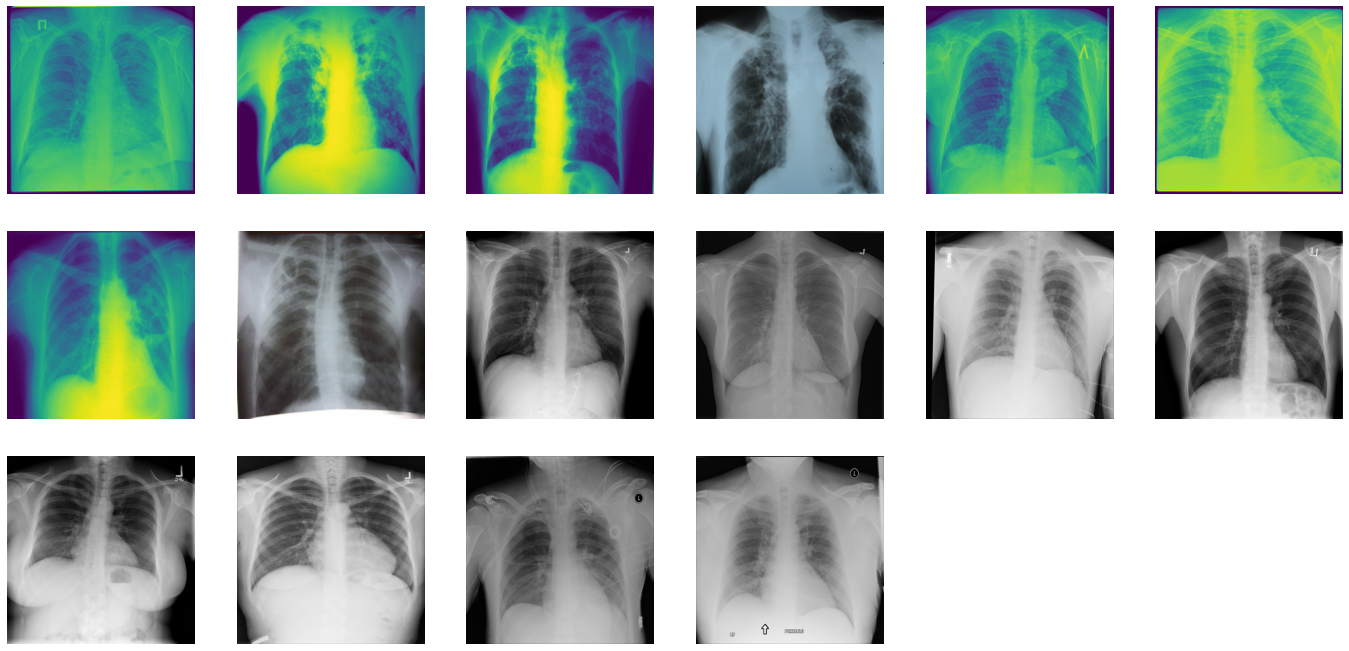

In [12]:
nrows= 5
ncols= 6
pic_index= 0

fig= plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8

tuberculosis_img = [os.path.join(tuberculosis_data, image) for image in os.listdir(tuberculosis_data)[pic_index-8:pic_index]]
normal_img = [os.path.join(normal_data, image) for image in os.listdir(normal_data)[pic_index-8:pic_index]]

for i, image_path in enumerate(tuberculosis_img+normal_img):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = mpimg.imread(image_path)
    plt.imshow(img)

plt.show()

In [15]:
# generating training data
print("training data :")
train_datagen= ImageDataGenerator(rescale=1/255, zoom_range=0.2,  width_shift_range= 0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True,  validation_split = 0.2)

train_data = train_datagen.flow_from_directory(base_dir, 
                                              target_size= (64,64),
                                              class_mode= "binary",
                                              batch_size=32,
                                              subset= "training"
                                              )

# genarating validation data
print("\nvalidation data :")
val_datagen= ImageDataGenerator(rescale= 1/255, validation_split= 0.2)

val_data= train_datagen.flow_from_directory(base_dir, 
                                              target_size= (64,64),
                                              class_mode= "binary",
                                              batch_size=32,
                                              shuffle= False,
                                              subset= "validation"
                                              )

training data :
Found 3360 images belonging to 2 classes.

validation data :
Found 840 images belonging to 2 classes.


In [41]:
#1 model
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64,64,3))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (9, 9), activation='relu',input_shape=(64,64,3))) #secondlayer
model.add(layers.MaxPooling2D((4, 4)))

model.add(layers.Flatten())


model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 64)) 
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 23, 23, 64)        165952    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                51232     
_________________________________________________________________
dense_18 (Dense)             (None, 16)               

In [42]:
model.fit(train_data, validation_data=val_data, epochs=15)

Epoch 1/15
105/105 [==============================] - 67s 635ms/step - loss: 0.4842 - accuracy: 0.8080 - val_loss: 0.4100 - val_accuracy: 0.8560
Epoch 2/15
105/105 [==============================] - 65s 614ms/step - loss: 0.3504 - accuracy: 0.8952 - val_loss: 0.4213 - val_accuracy: 0.8393
Epoch 3/15
105/105 [==============================] - 65s 617ms/step - loss: 0.3010 - accuracy: 0.8932 - val_loss: 0.4112 - val_accuracy: 0.8607
Epoch 4/15
105/105 [==============================] - 66s 632ms/step - loss: 0.3347 - accuracy: 0.8690 - val_loss: 0.3722 - val_accuracy: 0.8369
Epoch 5/15
105/105 [==============================] - 65s 622ms/step - loss: 0.2821 - accuracy: 0.8910 - val_loss: 0.3875 - val_accuracy: 0.8548
Epoch 6/15
105/105 [==============================] - 65s 614ms/step - loss: 0.2550 - accuracy: 0.9097 - val_loss: 0.3167 - val_accuracy: 0.8607
Epoch 7/15
105/105 [==============================] - 66s 629ms/step - loss: 0.2415 - accuracy: 0.9114 - val_loss: 0.3192 - val_ac

In [43]:
prediction= model.predict(val_data, steps=np.ceil(val_data.samples/val_data.batch_size), verbose=2)
prediction= (prediction > 0.5)
prediction

27/27 - 10s


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [44]:
val_labels=val_data.classes
val_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [45]:
val_labels=val_data.classes
val_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

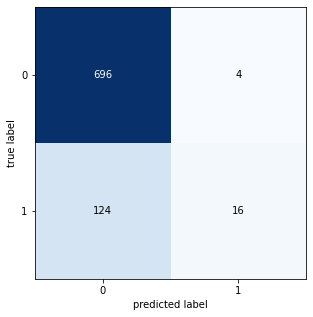

In [46]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix
cm= confusion_matrix(val_data.classes, prediction)
plot_confusion_matrix(cm, figsize=(5,5))

In [47]:
print(accuracy_score(val_data.classes, prediction))
print(classification_report(val_data.classes, prediction))

0.8476190476190476
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       700
           1       0.80      0.11      0.20       140

    accuracy                           0.85       840
   macro avg       0.82      0.55      0.56       840
weighted avg       0.84      0.85      0.80       840



# model2

In [31]:
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(64,64,3))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64,64,3))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (6, 6), activation='relu',input_shape=(64,64,3))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (6, 6), activation='relu',padding="same",input_shape=(64,64,3))) #secondlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())


model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 64)) 
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 32)          36896     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 64)         

In [32]:
model.fit(train_data, validation_data=val_data, epochs=15)

Epoch 1/15
105/105 [==============================] - 53s 504ms/step - loss: 0.5533 - accuracy: 0.8244 - val_loss: 0.4426 - val_accuracy: 0.8333
Epoch 2/15
105/105 [==============================] - 52s 495ms/step - loss: 0.4431 - accuracy: 0.8175 - val_loss: 0.4071 - val_accuracy: 0.8333
Epoch 3/15
105/105 [==============================] - 53s 509ms/step - loss: 0.3141 - accuracy: 0.8505 - val_loss: 0.4228 - val_accuracy: 0.8583
Epoch 4/15
105/105 [==============================] - 52s 499ms/step - loss: 0.3163 - accuracy: 0.9084 - val_loss: 0.3831 - val_accuracy: 0.8583
Epoch 5/15
105/105 [==============================] - 52s 493ms/step - loss: 0.2317 - accuracy: 0.9160 - val_loss: 0.2985 - val_accuracy: 0.8583
Epoch 6/15
105/105 [==============================] - 51s 489ms/step - loss: 0.1855 - accuracy: 0.9322 - val_loss: 0.2846 - val_accuracy: 0.8583
Epoch 7/15
105/105 [==============================] - 52s 500ms/step - loss: 0.1775 - accuracy: 0.9283 - val_loss: 0.2872 - val_ac

In [33]:
prediction= model.predict(val_data, steps=np.ceil(val_data.samples/val_data.batch_size), verbose=2)
prediction= (prediction > 0.5)
prediction

27/27 - 10s


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [38]:
val_labels=val_data.classes
val_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

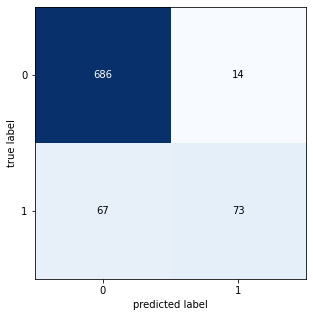

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix
cm= confusion_matrix(val_data.classes, prediction)
plot_confusion_matrix(cm, figsize=(5,5))

In [40]:
print(accuracy_score(val_data.classes, prediction))
print(classification_report(val_data.classes, prediction))

0.9035714285714286
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       700
           1       0.84      0.52      0.64       140

    accuracy                           0.90       840
   macro avg       0.88      0.75      0.79       840
weighted avg       0.90      0.90      0.89       840

